In [2]:
!pip install opendatasets
!pip install pandas

     -------------------------------------- 63.3/63.3 kB 842.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77731 sha256=3cb5566cbca6866b28496f733a39935c787b269f7007e2cba3ce90fcd00c633f
  Stored in directory: c:\users\mfarh\appdata\local\pip\cache\wheels\1b\22\79\e73b3e988388377c1cda3385bfa20c1799be101c2e12bbe3dc
Successfully built kaggle


In [3]:
import opendatasets as od

In [4]:
od.download(
    "https://www.kaggle.com/datasets/gverzea/edible-wild-plants")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mfarhandr
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 766M/766M [08:03<00:00, 1.66MB/s]


In [7]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 1.1 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
     ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached flatbuffers-23.5.9-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     -------------------------------------- 422.5/422.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 1.9 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached jax-0.4.10.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
 

In [67]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [140]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. , shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3 )
test_datagen  = ImageDataGenerator( rescale = 1.0/255.  )

In [99]:
base_dir = 'edible-wild-plants'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/datasets/dataset'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/datasets/dataset-test'))

Contents of base directory:
['datasets', 'edible wild plants metadata.xls', 'final_model_weights.hdf5', 'vanilla_model_weights.hdf5']

Contents of train directory:
['Alfalfa', 'Asparagus', 'Blue Vervain', 'Broadleaf Plantain', 'Bull Thistle', 'Cattail', 'Chickweed', 'Chicory', 'Cleavers', 'Coltsfoot', 'Common Sow Thistle', 'Common Yarrow', 'Coneflower', 'Creeping Charlie', 'Crimson Clover', 'Curly Dock', 'Daisy Fleabane', 'Dandellion', 'Downy Yellow Violet', 'Elderberry', 'Evening Primrose', 'Fern Leaf Yarrow', 'Field Pennycress', 'Fireweed', 'Forget Me Not', 'Garlic Mustard', 'Harebell', 'Henbit', 'Herb Robert', 'Japanese Knotweed', 'Joe Pye Weed', 'Knapweed', 'Kudzu', 'Lambs Quarters', 'Mallow', 'Mayapple', 'Meadowsweet', 'Milk Thistle', 'Mullein', 'New England Aster', 'Partridgeberry', 'Peppergrass', 'Pickerelweed', 'Pineapple Weed', 'Prickly Pear Cactus', 'Purple Deadnettle', 'Queen Annes Lace', 'Red Clover', 'Sheep Sorrel', 'Shepherds Purse', 'Spring Beauty', 'Sunflower', 'Supplej

In [100]:
train_dir = 'edible-wild-plants/datasets/dataset'
val_dir = 'edible-wild-plants/datasets/dataset-test'

In [141]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150)) 

Found 6558 images belonging to 62 classes.


In [142]:
val_generator = test_datagen.flow_from_directory(val_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150) )

Found 310 images belonging to 62 classes.


In [124]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [56]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [57]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [125]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [60]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [110]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
#x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
               
# Add a final sigmoid layer for classification
x = layers.Dense  (62, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [111]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 74, 74, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [77]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            validation_data = val_generator,
            epochs = 50,
            callbacks=[callbacks])

C:\Users\mfarh\AppData\Local\Temp\ipykernel_34256\2773115012.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
100/100 [==============================] - 145s 1s/step - loss: 4.4876 - acc: 0.2475 - val_loss: 4.2816 - val_acc: 0.0774
Epoch 2/50
100/100 [==============================] - 129s 1s/step - loss: 2.9625 - acc: 0.3202 - val_loss: 4.2733 - val_acc: 0.0774
Epoch 3/50
100/100 [==============================] - 121s 1s/step - loss: 2.8536 - acc: 0.3344 - val_loss: 4.1945 - val_acc: 0.0613
Epoch 4/50
100/100 [==============================] - 113s 1s/step - loss: 2.8392 - acc: 0.3330 - val_loss: 4.4349 - val_acc: 0.0677
Epoch 5/50
100/100 [==============================] - 153s 2s/step - loss: 2.7590 - acc: 0.3484 - val_loss: 3.9459 - val_acc: 0.0935
Epoch 6/50
100/100 [==============================] - 160s 2s/step - loss: 2.6044 - acc: 0.3797 - val_loss: 4.0128 - val_acc: 0.0839
Epoch 7/50
100/100 [==============================] - 150s 2s/step - loss: 2.5617 - acc: 0.3777 - val_loss: 3.7078 - val_acc: 0.1032
Epoch 8/50
100/100 [==============================] - 144s 1s/step - 

In [130]:
# Flatten the output layer to 1 dimension
x2 = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x2 = layers.Dense(1024, activation='relu')(x2)             
# Add a final sigmoid layer for classification
x2 = layers.Dense  (62, activation='softmax')(x2)           

model2 = Model( pre_trained_model.input, x2) 

model2.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
model2.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 74, 74, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_376 (Batch  (None, 74, 74, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [131]:
callbacks2 = myCallback()
history2 = model2.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            validation_data = val_generator,
            epochs = 50,
            callbacks=[callbacks2])

C:\Users\mfarh\AppData\Local\Temp\ipykernel_34256\2078527636.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


Epoch 1/50
100/100 [==============================] - 627s 6s/step - loss: 3.1411 - acc: 0.2824 - val_loss: 29.1683 - val_acc: 0.0161
Epoch 2/50
100/100 [==============================] - 484s 5s/step - loss: 2.5971 - acc: 0.3503 - val_loss: 271.6674 - val_acc: 0.0226
Epoch 3/50
100/100 [==============================] - 550s 5s/step - loss: 2.3397 - acc: 0.3881 - val_loss: 5.1539 - val_acc: 0.0871
Epoch 4/50
100/100 [==============================] - 547s 5s/step - loss: 2.1236 - acc: 0.4278 - val_loss: 4.2486 - val_acc: 0.0935
Epoch 5/50
100/100 [==============================] - 499s 5s/step - loss: 1.9943 - acc: 0.4722 - val_loss: 7.5575 - val_acc: 0.0581
Epoch 6/50
100/100 [==============================] - 385s 4s/step - loss: 1.8295 - acc: 0.4925 - val_loss: 24.6672 - val_acc: 0.0290
Epoch 7/50
100/100 [==============================] - 332s 3s/step - loss: 1.7348 - acc: 0.5103 - val_loss: 3.4833 - val_acc: 0.1935
Epoch 8/50
100/100 [==============================] - 335s 3s/ste

In [117]:
from tensorflow.keras.models import load_model
model3 = load_model('edible-wild-plants/final_model_weights.hdf5')
model3.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0  

In [120]:
history3 = model3.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            validation_data = val_generator,
            epochs = 50)

C:\Users\mfarh\AppData\Local\Temp\ipykernel_34256\3451457277.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(


Epoch 1/50
100/100 [==============================] - 513s 5s/step - loss: 2.3548 - accuracy: 0.6166 - val_loss: 3.9499 - val_accuracy: 0.3742
Epoch 2/50
 32/100 [========>.....................] - ETA: 5:28 - loss: 1.7266 - accuracy: 0.6572

KeyboardInterrupt: 

In [132]:
from tensorflow.keras.applications.vgg16 import VGG16

In [133]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False


58889256/58889256 [==============================] - 24s 0us/step


In [134]:
base_model.summary()

for layer in base_model.layers:
  layer.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [136]:
x4 = layers.Flatten()(base_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x4 = layers.Dense(1024, activation='relu')(x4)
x4 = layers.Dropout(0.2)(x4) 
x4 = layers.Dense  (62, activation='softmax')(x4)           

model4 = Model( base_model.input, x4) 

model4.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
model4.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0  

In [143]:
history4 = model4.fit_generator(
            train_generator,
            validation_data = val_generator,
            epochs = 50)

C:\Users\mfarh\AppData\Local\Temp\ipykernel_34256\2243998226.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(


Epoch 1/50
205/205 [==============================] - 685s 3s/step - loss: 1.8311 - acc: 0.5113
Epoch 2/50
205/205 [==============================] - 717s 3s/step - loss: 1.6498 - acc: 0.5500
Epoch 3/50
205/205 [==============================] - 677s 3s/step - loss: 1.5069 - acc: 0.5750
Epoch 4/50
205/205 [==============================] - 1533s 7s/step - loss: 1.4353 - acc: 0.5961
Epoch 5/50
205/205 [==============================] - 33544s 164s/step - loss: 1.3353 - acc: 0.6199
Epoch 6/50
205/205 [==============================] - 687s 3s/step - loss: 1.2531 - acc: 0.6406
Epoch 7/50
205/205 [==============================] - 691s 3s/step - loss: 1.1966 - acc: 0.6543
Epoch 8/50
205/205 [==============================] - 731s 4s/step - loss: 1.1410 - acc: 0.6717
Epoch 9/50
205/205 [==============================] - 783s 4s/step - loss: 1.0514 - acc: 0.6866
Epoch 10/50
205/205 [==============================] - 772s 4s/step - loss: 1.0135 - acc: 0.6993
Epoch 11/50
205/205 [=============

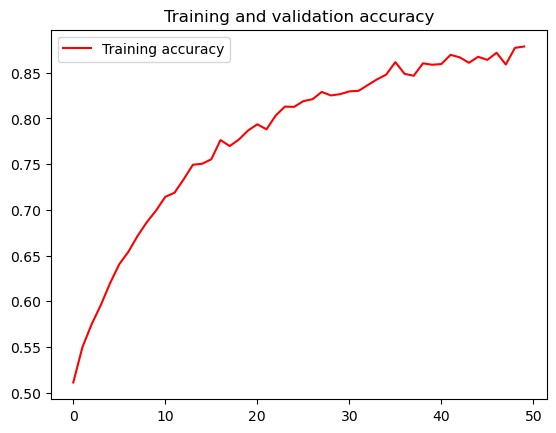

<Figure size 640x480 with 0 Axes>

In [149]:
import matplotlib.pyplot as plt
acc = history4.history['acc']
#val_acc = history4.history['val_acc']
loss = history4.history['loss']
#val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()